In [2]:
import os
os.chdir("../") # This is necessary to find utils module


In [98]:
import importlib
import matplotlib.pyplot as plt
import pickle

import utils.visualisations as vis

with open("../results/evaluation/metrics/eqt_metrics_no_res_lstm.pickle", "rb") as f:
    metrics_none = pickle.load(f)

with open("../results/evaluation/metrics/eqt_metrics_reduced_encoder.pickle", "rb") as f:
    metrics_reduced = pickle.load(f)

with open("../results/evaluation/metrics/eqt_metrics.pickle", "rb") as f:
    metrics_normal = pickle.load(f)


In [99]:
metrics_none.keys()


dict_keys(['det_roc', 'det_confusion_matrix', 'det_precision_score', 'det_recall_score', 'det_f1_score', 'p_mu', 'p_std', 'p_MAE', 'p_MAPE', 's_mu', 's_std', 's_MAE', 's_MAPE'])

In [163]:
importlib.reload(vis)


<module 'utils.visualisations' from '/home/trahn/git/Earthquake_Monitoring/code/utils/visualisations.py'>

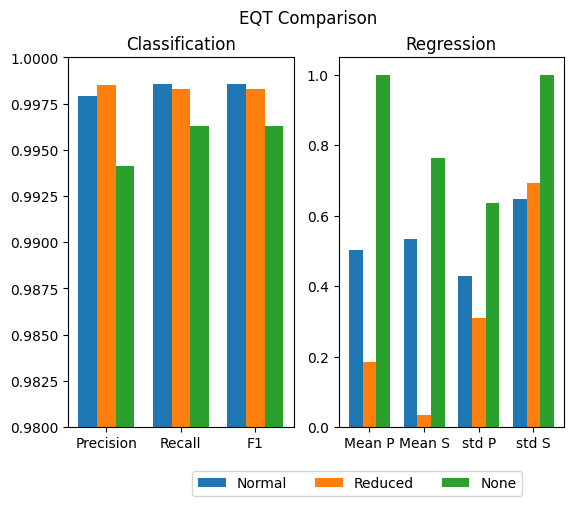

In [164]:
fig, axs = plt.subplots(1, 2)

fig.suptitle('EQT Comparison')

vis.model_comparison({'Normal': metrics_normal, 'Reduced': metrics_reduced, 'None': metrics_none}, axs=axs)
